# Analyse des ventes de l'entreprise «LaPage»

##  Rappel du contexte
Je suis Data Analyst chez la grande chaîne de librairie "LaPage", qui s'est d'abord développée dans une grande ville de France, avec plusieurs magasins, jusqu'à décider d'ouvrir une boutique en ligne. Son approche de la vente de livres en ligne, basée sur des algorithmes de recommandation, lui a valu un franc succès !

**objectif**
On souhaite aujourd'hui faire le point après deux ans d’exercice, et pouvoir analyser les points forts, les points faibles, les comportements clients, etc. Voyons plus en détail l'approche Business de l'exploitation…

In [1]:
#Import des librairies Python
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import math as mth

In [2]:
#Paramètres graphiques
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = [14, 7]
plt.rcParams['font.size'] = 16

In [3]:
#Import des fichiers csv extraits directement de la base de données de l’entreprise
df_transactions = pd.read_csv('transactions.csv') #les ventes (appelées “Transactions”)
df_products = pd.read_csv('products.csv') #la liste des produits
df_customers = pd.read_csv('customers.csv') #la liste des clients

# Mission 1 : nettoyage des données

In [4]:
#Visualisation rapide de nos 3 dataframes
print(df_products.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB
None


In [5]:
print(df_customers.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB
None


In [6]:

print(df_transactions.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB
None


## Traitement des valeurs manquantes

In [7]:
#Méthode .isnull() (ou .isna())sur les données produits, renvoi de booléens par colonne
df_products.isnull().any()

id_prod    False
price      False
categ      False
dtype: bool

Aucune valeur manquante dans df_products.

In [8]:
#Méthode .isnull() sur les données clients, renvoi de booléens par colonne
df_customers.isnull().any()

client_id    False
sex          False
birth        False
dtype: bool

Aucune valeur manquante dans df_customers.

In [9]:
#Méthode .isnull() sur les données transactions, renvoi de booléens par colonne
df_transactions.isnull().any()

id_prod       False
date          False
session_id    False
client_id     False
dtype: bool

Aucune valeur manquante dans df_transactions.
mais est ce qu'il y'en a des valeurs atypiques ou aberrantes?!

## Traitement des valeurs aberrantes et atypiques
Par valeur aberrante, on s'attend à identifier des valeurs vraisemblablement fausses, et pour les valeurs atypiques elles restent possibles, pas forcément fausses.

### Analyse et correction éventuelle du dataframe df_products :

In [10]:
#Tri rapide sur les 5 premières lignes du dataframe df_product (méthode .sort_values())
df_products.sort_values('id_prod', ascending = False).head()

,id_prod,price,categ
731,T_0,-1.00,0
3188,2_99,84.99,2
3088,2_98,149.74,2
2698,2_97,160.99,2
2576,2_96,47.91,2


In [11]:
#Tri rapide sur les 5 dernières lignes du dataframe df_products
df_products.sort_values('id_prod', ascending = False).tail()

,id_prod,price,categ
922,0_1000,6.84,0
663,0_100,20.60,0
2691,0_10,17.95,0
803,0_1,10.99,0
1001,0_0,3.75,0


Ligne index 731 id_prod T_0 et price ne sont pas acceptables (valeur test négative).

In [12]:
#Vérification par restriction des valeurs négatives (ou nulles) dans df_products
df_products[df_products.price <= 0]

,id_prod,price,categ
731,T_0,-1.0,0


La liste des produits vendus recense une seule valeur négative (- 1€) très certainement liée à une transaction de test.

In [13]:
values_tests=df_products[df_products['id_prod'].str.contains("T")]
values_tests

,id_prod,price,categ
731,T_0,-1.0,0


In [14]:
#Suppression de la ligne index 731, la valeur n'a aucune signification logique
df_products = df_products[df_products.id_prod != 'T_0']

In [15]:
df_products['price'].describe()

count    3286.000000
mean       21.863597
std        29.849786
min         0.620000
25%         6.990000
50%        13.075000
75%        22.990000
max       300.000000
Name: price, dtype: float64

Aucune anomalie sur les prix min. et max., les prix produits en queue de distribution sont plausibles.

### Analyse et correction éventuelle du dataframe *df_customers* :

In [16]:
#Tri rapide sur les 5 premières lignes du dataframe df_customers (méthode .sort_values())
df_customers.sort_values('client_id', ascending = False).head()

,client_id,sex,birth
8494,ct_1,m,2001
2735,ct_0,f,2001
7358,c_999,m,1964
2145,c_998,m,2001
94,c_997,f,1994


In [17]:
#Tri rapide sur les 5 dernières lignes du dataframe df_customers
df_customers.sort_values('client_id', ascending = False).tail()

,client_id,sex,birth
3426,c_1001,m,1982
8472,c_1000,f,1966
2137,c_100,m,1992
6894,c_10,m,1956
4299,c_1,m,1955


In [18]:
values_tests=df_customers[df_customers['client_id'].str.contains("ct")]
values_tests

,client_id,sex,birth
2735,ct_0,f,2001
8494,ct_1,m,2001


client_id, ct_1 et ct_2 semblent ne pas avoir la même forme d'écriture, le "ct" ressemble à un identifiant de test.

In [19]:
#Suppression des deux lignes client_id ct_1 et ct_2
df_customers = df_customers[(df_customers.client_id != 'ct_0') & (df_customers.client_id != 'ct_1')]

In [20]:
#Vérification rapide de la cohérence des âges clients
print(df_customers.sort_values(by='birth', ascending=False).head())
print(df_customers.sort_values(by='birth', ascending=True).head())

     client_id sex  birth
7078    c_8245   f   2004
6330    c_2854   m   2004
445     c_2627   m   2004
1787    c_7916   f   2004
2947     c_308   f   2004
     client_id sex  birth
4569     c_577   m   1929
2491    c_8362   f   1929
418     c_5302   m   1929
1086    c_3218   f   1930
5138    c_7232   f   1930


*Les plus jeunes clients ont 18 ans, les plus âgés 93 ans. Aucune anomalie.*

In [21]:
df = df_customers[(df_customers.sex != 'f') & (df_customers.sex != 'm')]
df

,client_id,sex,birth


La variable **'sex'** ne prend aucune autre valeur que **'m'** pour monsieur et **'f'** pour femme

### Analyse et correction éventuelle du dataframe *df_transactions* :

In [22]:
#Tri rapide sur les 5 premières lignes du dataframe df_transactions (méthode .sort_values())
df_transactions.sort_values('client_id', ascending = False).head()

,id_prod,date,session_id,client_id
638483,T_0,test_2021-03-01 02:30:02.237444,s_0,ct_1
589180,T_0,test_2021-03-01 02:30:02.237443,s_0,ct_1
338563,T_0,test_2021-03-01 02:30:02.237433,s_0,ct_1
245235,T_0,test_2021-03-01 02:30:02.237415,s_0,ct_1
525297,T_0,test_2021-03-01 02:30:02.237418,s_0,ct_1


In [23]:
#Tri rapide sur les 5 dernières lignes du dataframe df_transactions
df_transactions.sort_values('client_id', ascending = False).tail()

,id_prod,date,session_id,client_id
673656,0_2277,2021-09-06 18:34:16.975976,s_85977,c_1
620939,1_425,2021-12-25 03:53:43.623598,s_139610,c_1
72185,0_2277,2022-10-06 18:34:16.975976,s_278688,c_1
488625,0_513,2022-12-21 22:41:38.769525,s_315508,c_1
318987,0_1880,2021-11-04 18:37:01.482109,s_114737,c_1


In [24]:
tests=df_transactions[df_transactions['id_prod'].str.contains("T")]
tests


,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Identification de nouvelles valeurs "test".

Valeurs directement liées aux client_id ct_1 et ct_2 identifiées précédemment.


In [25]:
#Suppression des valeurs test
df_transactions = df_transactions[df_transactions.id_prod != 'T_0']

In [26]:
#Conversion des valeurs de la colonne 'date' dans le bon format date (méthode .to_datetime())
df_transactions['date'] = pd.to_datetime(df_transactions.date, format='%Y-%m-%d %H:%M:%S', errors = 'coerce')

#Vérification du type de données
df_transactions.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

In [27]:
#L'argument "errors = 'coerce'" de la méthode renvoie (NaT) si la conversion n'est pas possible
#Vérification des éventuelles valeurs manquantes
df_transactions.date.isnull().sum()

0

## Traitement des éventuels doublons

In [28]:
#Méthode .duplicated() pour identifier la présence de doublons
print(df_products.duplicated().sum())
print(df_customers.duplicated().sum())
print(df_transactions.duplicated().sum())

0
0
0


Aucun doublon détecté dans nos 3 dataframes.

In [29]:
# vérification de la clé primaire
print(df_products['id_prod'].is_unique)
print(df_customers['client_id'].is_unique)

True
True


En conclusion, à ce stade de l'analyse, seules des valeurs dites "test" ont été supprimées pour ne pas fausser l'étude. Il n'y a pas vraiment de valeurs atypiques, les prix en queue de distribution restent cohérents, ainsi que les clients les plus âgés.

## Préparation des données transactionnelles produits

In [30]:
df_products.shape

(3286, 3)

In [31]:
df_transactions.shape

(679332, 4)

In [32]:
#Jointure pour agréger les valeurs 'transactions' avec celles 'products' (méthode .merge())
df_transactions_products = pd.merge(df_transactions, df_products, on='id_prod', how='left')
df_transactions_products.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0


In [33]:
df_transactions_products.shape

(679332, 6)

In [34]:
#Vérification d'éventuelles valeurs manquantes (méthode .isnull())
df_transactions_products.isnull().sum()

id_prod         0
date            0
session_id      0
client_id       0
price         221
categ         221
dtype: int64

Aucun id produit manquant, il est intéressant de détecter le ou les produits concernés par les valeurs manquantes
Création d'un dataframe ciblant uniquement ces NaN

In [35]:
#df_missing_values = df_transactions_products[df_transactions_products.categ.isnull() == True]
df_missing_values = df_transactions_products[df_transactions_products.price.isnull() == True]

In [36]:
#Recherche du ou des produits concernés
df_missing_values.id_prod.unique()

array(['0_2245'], dtype=object)

In [37]:
df_missing_values.head()

,id_prod,date,session_id,client_id,price,categ
2633,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN
10103,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN
11723,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN
15670,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN
16372,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN


Seul le produit id 0_2245 est concerné par les valeurs manquantes.


In [38]:

df_transactions_products['price'] = df_transactions_products.price.fillna(df_transactions_products.price.mean())

Exactement 221 lignes non exploitables dans l'état pour le produit id 0_2245
Il est préférable de les conserver en remplacant les prix NaN par le prix moyen

In [39]:

#Méthode .fillna() pour remplacer les NaN de la variable catégorie par 0
df_transactions_products['categ'] = df_transactions_products.categ.fillna(0)

Le produit id 0_2245 doit-être classifié en catégorie 0, il commence par "0_"

In [40]:
#Nouvelle vérification des valeurs manquantes, normalement les catégories sont désormais sans NaN
df_transactions_products.isnull().sum()

id_prod       0
date          0
session_id    0
client_id     0
price         0
categ         0
dtype: int64

In [41]:
#Préparation des données par jointure pour agréger les valeurs 'customers' avec celles 'transactionsv1_products'
df = pd.merge(df_customers, df_transactions_products, on='client_id', how='inner')
df.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,25.99,1.0
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,14.53,1.0
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0.0
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1.0


In [42]:
df.shape

(679332, 8)

In [43]:
df.isnull().sum()

client_id     0
sex           0
birth         0
id_prod       0
date          0
session_id    0
price         0
categ         0
dtype: int64

## L'ajout d'une colonne age


Il est judicieux, pour plus de compréhension, d'ajouter une colonne 'age'.

In [44]:
#Ajout d'une colonne'age' pour faciliter l'analyse
df['age'] = 2022 - df.birth

In [45]:
#Visualisation rapide de dataframe df
df.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,55
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,25.99,1.0,55
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,14.53,1.0,55
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0.0,55
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1.0,55


#  Mission 2 : les analyses univariées

## Brief sur les variables des 3 dataframes

Variable quantitative :

    -Les prix produits 
Variables qualitatives :

    -Les id (client_id, id_prod, session_id) 
    -Les dates de transactions (de 2021-03-01 à 2022-02-28) 
    -Le sexe des clients (f ou m) 
    -Les catégories produits (0, 1 ou 2) 
Afin de mieux comprendre les ventes, l'analyse portera principalement sur les dimensions suivantes :

    -L'évolution des ventes (Chiffre d'Affaires) 
    -Les prix produits pratiqués 
    -La répartition sectorielle (par Catégorie) 
    -La répartition démographique (par âge et sexe client) 
    -Le comportement client (fidélisation) Corrélation, lien(s) possible(s) entre les variables

## Analyse de l'évolution du chiffre d'affaires

In [46]:
#Agrégation des données transactionnelles par fréquence mensuelle (méthode .groupby())
df_transactions_months = df_transactions_products.groupby(pd.Grouper(key='date', freq='M')).sum().reset_index()

df_transactions_months['ventes_keuros'] = df_transactions_months.price / 1000
df_transactions_months = df_transactions_months[['date', 'ventes_keuros']]
df_transactions_months

,date,ventes_keuros
0,2021-03-31,482.597703
1,2021-04-30,476.353667
2,2021-05-31,493.083108
3,2021-06-30,484.210743
4,2021-07-31,482.905219
5,2021-08-31,482.441883
6,2021-09-30,507.450137
7,2021-10-31,320.920923
8,2021-11-30,516.342278
9,2021-12-31,526.039463


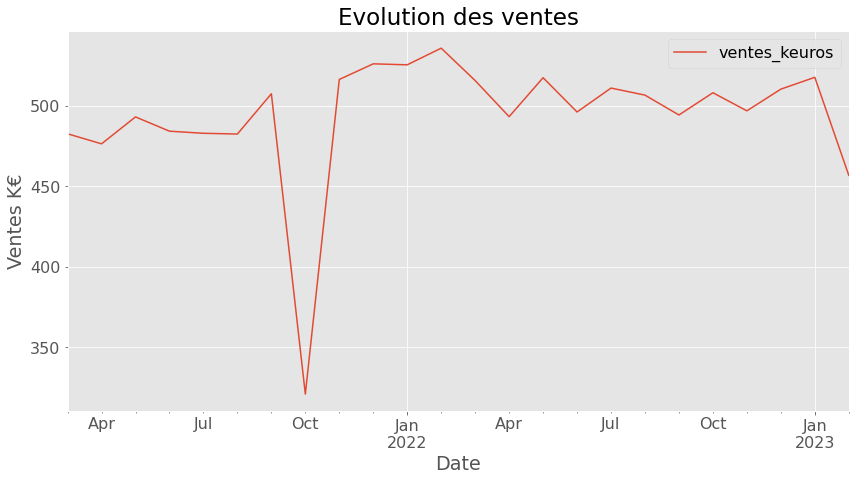

In [47]:
#Visualisation de l'évolution des ventes sur les 12 derniers mois
df_transactions_months.plot(x='date', y='ventes_keuros')

plt.title('Evolution des ventes')
plt.xlabel('Date')
plt.ylabel('Ventes K€')

plt.savefig("graphic/evolution_ventes.png")
plt.show()

*Une baisse d'activité significative est enregistrée sur le mois d'octobre, mais pourquoi ?*

In [48]:
#Restriction selon les dates du mois d'octobre
transaction_october = len(df_transactions_products[(df_transactions_products.date > '2021-09-30') & \
                                                   (df_transactions_products.date < '2021-11-01')])
transaction_october

22917

In [49]:
#Restriction selon les dates du mois de septembre
transaction_september = len(df_transactions_products[(df_transactions_products.date > '2021-08-31') & \
                                                     (df_transactions_products.date < '2021-10-01')])
transaction_september

34148

Il semble manquer des valeurs sur le mois d'octobre, la visualisation le montre, et le nombre de lignes identifiées sur la période semble le confirmer également. Une vérification supplémentaire est nécessaire.

In [50]:
#Restriction par catégorie pour identifier les valeurs manquantes sur le mois d'octobre 
#les catégorie 0 et 2 sont tester aussi
df[(df.categ == 1) & (df.date > '2021-10-02') & \
                                                   (df.date < '2021-10-28')]

,client_id,sex,birth,id_prod,date,session_id,price,categ,age


Aucune transaction sur les produits de catégorie 1 durant le mois d'octobre.

Pour la suite de l'étude le mois d'octobre ne sera pas pris en compte, l'analyse se fera sur 11 mois au lieu de 12.

In [51]:
#Création (par restriction des dates)du dataframe 'df_transactionsv1' excluant les transactions du mois d'octobre
df =  df[(df.date <= '2021-09-30') | (df.date >= '2021-11-01')]

## Analyse des prix pratiques : variable '*price*' 

### > Mesures de tendance centrale et dispersion des prix produits *(toutes catégories confondues)*

In [52]:
#Calcul de la Moyenne des prix produits vendus 
round(df['price'].mean(), 2)

17.55

In [53]:
#Calcul de la Mediane des prix produits vendus
df['price'].median()

13.99

In [54]:
#Calcul du Mode des prix produits vendus
df['price'].mode()

0    15.99
dtype: float64

In [55]:
#Calcul de la Variance des prix produits vendus
round(df['price'].var(ddof=0), 2)

336.71

In [56]:
#Calcul de l'écart type des prix produits vendus 
round(df['price'].std(ddof=0), 2)

18.35

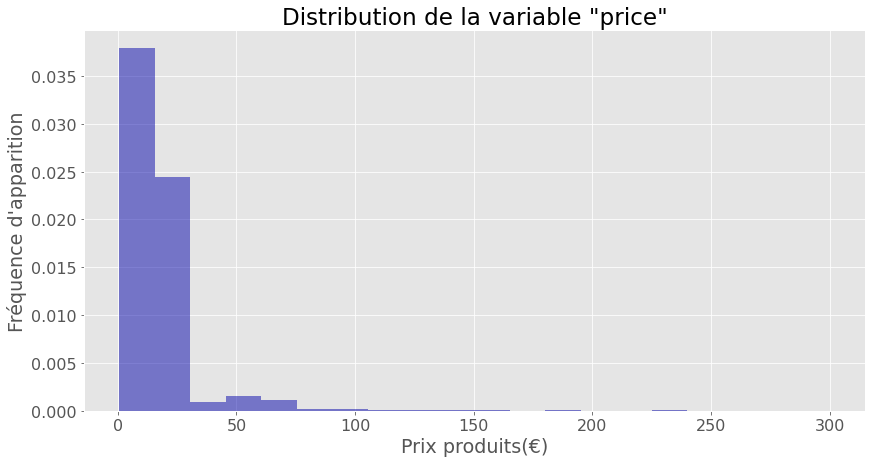

In [57]:
#Visualisation (Histogramme)de la distribution des prix produits
df['price'].hist(color='#0504aa', alpha=0.5, density=True, bins=20)

plt.title('Distribution de la variable "price"')
plt.xlabel('Prix produits(€)')
plt.ylabel('Fréquence d\'apparition')

plt.savefig("graphic/distribution_price.png")
plt.show()

Le graphiques nous montre que plus le plus est élevé plus la fréquence d'achat baisse.
Les produis les plus vendus ont des prix moins de 30 euros.

Plus bas nous verrons la distribution des prix produits par catégorie…

### > Mesure de concentration des prix produits *(toutes catégories confondues)*

In [58]:
#Sélection du sous-échantillon de travail que l'on appelle price
#On place les observations dans une variable
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations

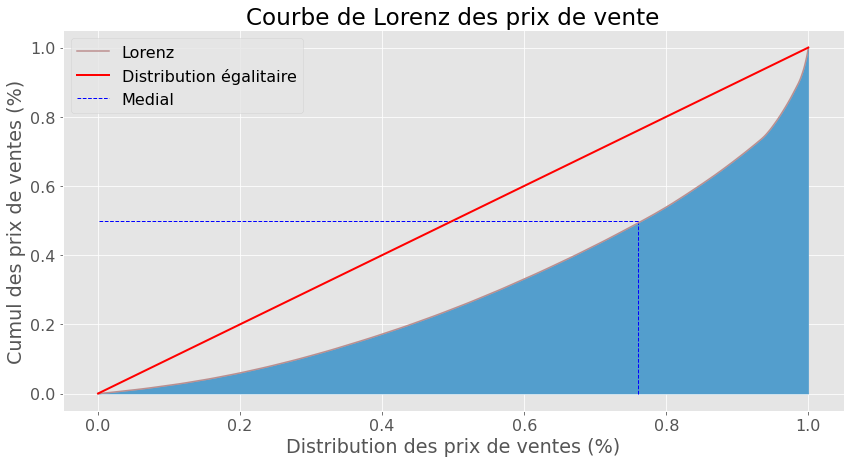

In [59]:
price = df['price'].values
lorenz_price = np.cumsum(np.sort(price)) / price.sum()
plt.plot(np.linspace(0,1,len(lorenz_price)), lorenz_price, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_price)) ,lorenz_price , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)
plt.title('Courbe de Lorenz des prix de vente')
plt.xlabel("Distribution des prix de ventes (%)")
plt.ylabel("Cumul des prix de ventes (%)")
plt.legend(loc="best")
plt.savefig("graphic/lorenz_price.png")
plt.show()

La courbe de Lorenz est une représentation graphique de la distribution d'une variable au sein d'une population. Elle permet de calculer le coefficient de Gini, qui mesure l'inégalité de cette variable dans une population donnée.

On constate que 76% des ventes représentent 50% du montant total des prix de vente. Ce n'est pas une égalité totale, mais acceptable dans notre contexte business.

In [60]:
#Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
aire_ss_courbe_price = lorenz_price[:-1].sum()/len(lorenz_price) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_ss_courbe_price 
gini_price = round(2*S, 2)

print("L'indice de Gini est égal à {}".format(gini_price))

L'indice de Gini est égal à 0.39


Confirmation avec l'indice de Gini plus proche de 0 que de 1, les prix pratiqués ont tendance à être équitables.

## Analyse sectorielle de l'activité selon la catégorie des produits 

In [61]:
#Représentation des effectifs par catégories de vente(méthode .value_counts())
effectif = df['categ'].value_counts()
modalite = effectif.index #l'index de 'effectifs' contient les modalités

tab = pd.DataFrame(modalite, columns = ['categ']) #création du tableau à partir des modalités
tab["n"] = effectif.values
tab["f"] = tab["n"] / len(df) #len(df) renvoie la taille de l'échantillon
tab

,categ,n,f
0,0.0,395961,0.603217
1,1.0,225161,0.343016
2,2.0,35293,0.053766


In [62]:
#Fréquences cumulées
tab = tab.sort_values("categ") # tri des valeurs de la variable X (croissant)
tab["F"] = tab["f"].cumsum() # cumsum calcule la somme cumulée
tab

,categ,n,f,F
0,0.0,395961,0.603217,0.603217
1,1.0,225161,0.343016,0.946234
2,2.0,35293,0.053766,1.000000


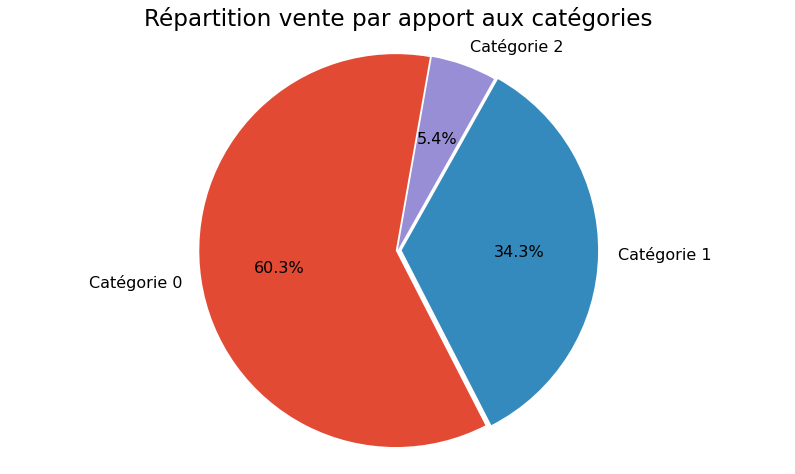

In [63]:
#Pie Chart pour représenter la part de chacune des catégories de vente
labels = 'Catégorie 0', 'Catégorie 1', 'Catégorie 2'
sizes = tab['f']
explode = (0.01, 0.02, 0)

fig1, ax1 = plt.subplots(figsize=(14,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=80)

ax1.axis('equal') 
plt.title('Répartition vente par apport aux catégories')
plt.savefig("graphic/repartition_categories.png")
plt.show()

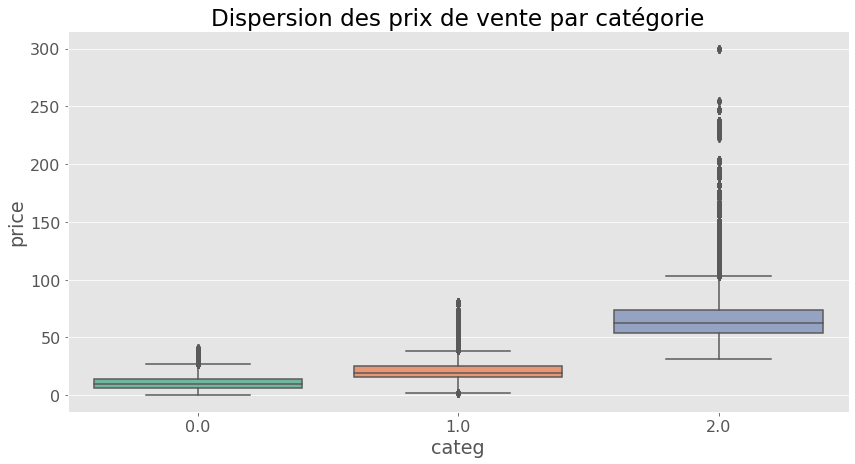

In [64]:
#boxplot
#Autre représentation possible avec Seaborn 
sns.boxplot(x = 'categ', y = 'price', data = df, palette="Set2")
plt.title('Dispersion des prix de vente par catégorie')
plt.show()

Les 3 catégories n'ont pas les mêmes types (ou gamme)de produits. La catégorie 2 par exemple a un prix moyen proche des 60€ avec des outliers en queue de distribution jusqu'à 300€.

La distribution des prix au sein de chacune des catégories n'est pas symétrique puisqu'elle ne présente pas la même forme. Nous avons presque une égalité entre la Moyenne et la Médiane, mais le Mode est à chaque fois plus éloigné.

### Répartition du nombre de produit par catégorie

In [65]:
#Comptage des produits présents en catégorie 0
cag0=len(df_products[df_products.categ == 0].groupby('id_prod'))
print(cag0)

2308


In [66]:
#Comptage des produits présents en catégorie 1
cag1=len(df_products[df_products.categ == 1].groupby('id_prod'))
print(cag1)

739


In [67]:
#Comptage des produits présents en catégorie 2
cag2=len(df_products[df_products.categ == 2].groupby('id_prod'))
print(cag2)

239


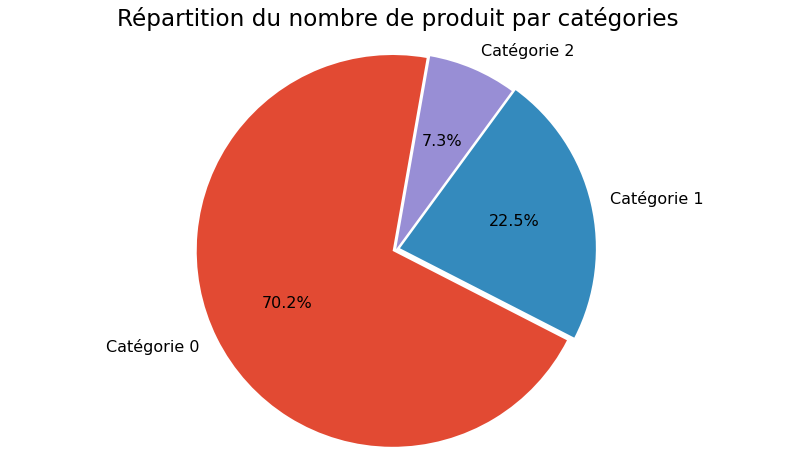

In [68]:
labels = 'Catégorie 0', 'Catégorie 1', 'Catégorie 2'
data = [cag0, cag1, cag2] 
sizes = data
explode = (0.02, 0.02, 0.0)
fig1, ax1 = plt.subplots(figsize=(14,8))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=80)
ax1.axis('equal') 
plt.title('Répartition du nombre de produit par catégories')
plt.savefig("graphic/repartition_categories.png")
plt.show()

 Il y'a visiblement peu de choix en catégorie 2.

## Analyse démographique de l'activité

### distribution des age clients

In [69]:
df.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,55
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,25.99,1.0,55
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,14.53,1.0,55
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0.0,55
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1.0,55


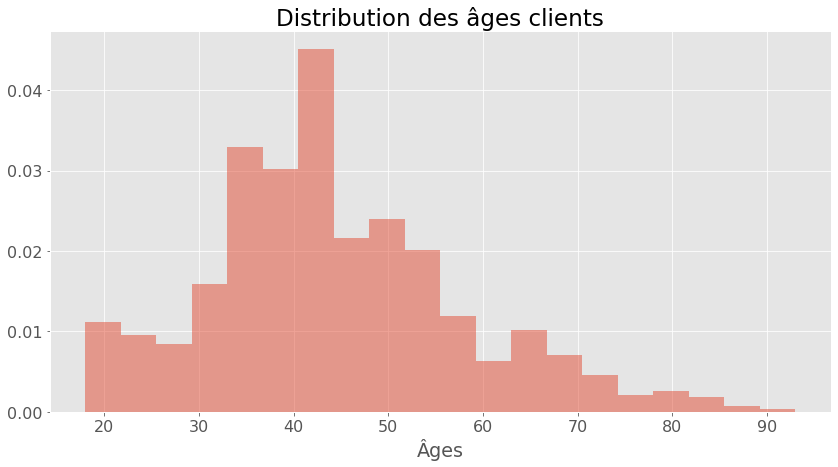

In [70]:
#Visualisation (Histogramme)de la distribution de l'âge clients
df['age'].hist(density=True, alpha=0.5, bins=20)
plt.xlabel('Âges')
plt.title('Distribution des âges clients')
plt.savefig("graphic/distribution_ages_clients.png")
plt.show()

La majeure partie des clients se concentrent entre 30 et 55 ans

###  Mesure de concentration des âges clients 

In [71]:
# Sélection du sous-échantillon de travail que l'on appelle ages

#On place les observations dans une variable
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations


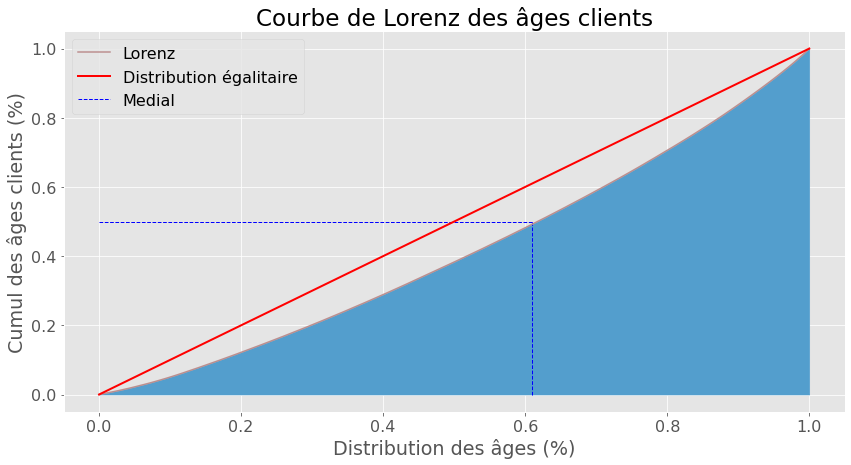

In [72]:
#Courbe de Lorenz sur la variable des âges 
ages = df['age'].values
lorenz_ages = np.cumsum(np.sort(ages)) / ages.sum()
plt.plot(np.linspace(0,1,len(lorenz_ages)), lorenz_ages, drawstyle='steps-post', color='rosybrown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_ages)) ,lorenz_ages , color='#539ecd')
plt.plot([0, 1], [0, 1], 'r-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.61, ymin=0, ymax=.5, color='blue', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.61, xmax=0, y=.5, color='blue', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des âges clients')
plt.xlabel("Distribution des âges (%)")
plt.ylabel("Cumul des âges clients (%)")

plt.legend(loc="best")
plt.savefig("graphic/lorenz_age.png")
plt.show()

On constate qu'environ 61% des âges clients représentent 50% du montant total des âges. C'est une égalité quasi parfaite, et nous pouvons le confirmer avec l'indice de Gini.

In [73]:
#Aire sous la courbe de Lorenz. La dernière valeur ne participe pas à l'aire, d'où "[:-1]"
aire_ss_courbe_age = lorenz_ages[:-1].sum()/len(lorenz_ages) 

#Aire entre la 1e bissectrice et la courbe de Lorenz
S = 0.5 - aire_ss_courbe_age
gini_age = round(2*S, 2)

print("L'indice de Gini est égal à {}".format(gini_age))

L'indice de Gini est égal à 0.17


Confirmation avec l'indice de Gini très proche de 0, les âges clients sont bien répartis, quasiment égalitaire dans notre contexte.

### La répartition Homme/Femme selon les catégories 

In [74]:
#Méthode .value_counts() pour avoir une idée rapide de la répartition homme/femme chez les clients
df['sex'].value_counts()

m    329133
f    327282
Name: sex, dtype: int64

In [75]:
#Méthode .pivot_table() pour affiner davantage la répartition des hommes et des femmes selon la catégorie d'achat
fm = df.pivot_table(index='sex', columns='categ', values='price', aggfunc=sum).reset_index()

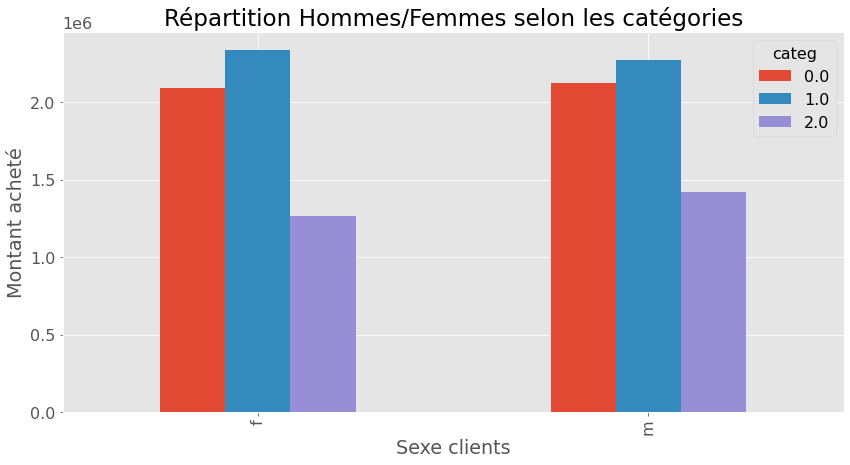

In [76]:
fm.plot(kind='bar', x='sex')

plt.title('Répartition Hommes/Femmes selon les catégories')
plt.xlabel('Sexe clients')
plt.ylabel('Montant acheté')

plt.savefig("graphic/sex_categ.png")
plt.show()

L'échantillon étudié ressort avec une égalité quasi parfaite entre les hommes et les femmes.

## Analyse comportementale des clients

### > Analyse des transactions par client

In [77]:
#Agrégation des modalités de la variable 'client_id' (méthode .groupby())
#L'objectif est de comprendre l'action de ré-achat (ou non)des clients
fid_client = df.groupby('client_id').count().reset_index()
fid_client['nb_transac'] = fid_client.session_id
fid_client = fid_client[['client_id', 'nb_transac']]
fid_client.head()

,client_id,nb_transac
0,c_1,38
1,c_10,58
2,c_100,8
3,c_1000,122
4,c_1001,95


In [78]:
#Estimation des clients ayant passés plus d'une commande dans l'année
a=fid_client[fid_client['nb_transac'] > 3].shape[0]
print(a)

8512


In [79]:
#Estimation des clients ayant passés 2 commandes dans l'année
b=fid_client[fid_client['nb_transac'] <= 3].shape[0]
print(b)

86


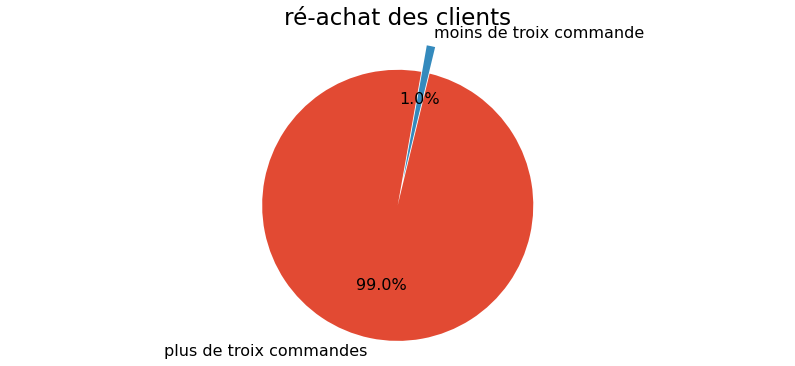

In [80]:
labels ='plus de troix commandes', 'moins de troix commande'
data = [a,b] 
sizes = data
explode = (0.1, 0.1)
fig1, ax1 = plt.subplots(figsize=(14,6))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=False, startangle=80)
ax1.axis('equal') 
plt.title('ré-achat des clients')
plt.savefig("graphic/ré-achat_des_clients.png")
plt.show()

*Excellente fidélisation des clients qui n'hésitent pas à revenir pour un nouvel achat.*

### > Analyse des centres d'intérêt client : "Catégorie d'affinité"

In [81]:
#Analyse des quantités de produits vendus selon les catéories
categ_prod = df.groupby('categ').price.count().reset_index()
categ_prod

,categ,price
0,0.0,395961
1,1.0,225161
2,2.0,35293


In [82]:
#Analyse du chiffre d'affaires selon les catégories
categ_sales = df.groupby('categ').price.sum().reset_index()
categ_sales

,categ,price
0,0.0,4.214242e+06
1,1.0,4.613040e+06
2,2.0,2.691256e+06


*La catégorie 2 ressort moins populaire que les deux autres, moins de quantités vendues, moins de chiffre d'affaires, mais un panier moyen qui reste beaucoup plus élevé.*

L'analyse va se poursuivre sur l'étude des liens éventuels entre les précédentes variables. L'enjeu est de comprendre les corrélations possibles ou non, de manière à pouvoir tirer des conclusions qui mènera l'entreprise à prendre des décisions stratégiques.

# Mission 3 : les corrélations…
**Les corrélations indiquent si deux variables sont linéairement équivalentes.**

Voici quelques questions supplémentaires pour nous aider à mieux comprendre les ventes enregistrées.

- Y a-t-il une corrélation entre le sexe des clients et les catégories de produits achetés ?
- Y a-t-il une corrélation entre l'âge des clients et le montant total des achats ?
- Y a-t-il une corrélation entre l'âge des clients et la fréquence d’achat (nombre d'achats par mois) ?
- Y a-t-il une corrélation entre l'âge des clients et la taille du panier moyen (en nombre d’articles) ?
- Y a-t-il une corrélation entre l'âge des clients et les catégories de produits achetés ?

**Un peu de théorie :**

Pour reprendre la définition de *Wikipédia* que je trouve plutôt bien trouvée : 

"En probabilités et en statistique, la corrélation entre plusieurs variables aléatoires ou statistiques est une notion de liaison qui contredit leur indépendance."

## Première approche des corrélations sur l'ensemble de nos variables numériques

In [83]:
#Utilisation de la méthode .corr()
df.corr().head()

,birth,price,categ,age
birth,1.000000,0.208823,0.097365,-1.000000
price,0.208823,1.000000,0.669576,-0.208823
categ,0.097365,0.669576,1.000000,-0.097365
age,-1.000000,-0.208823,-0.097365,1.000000


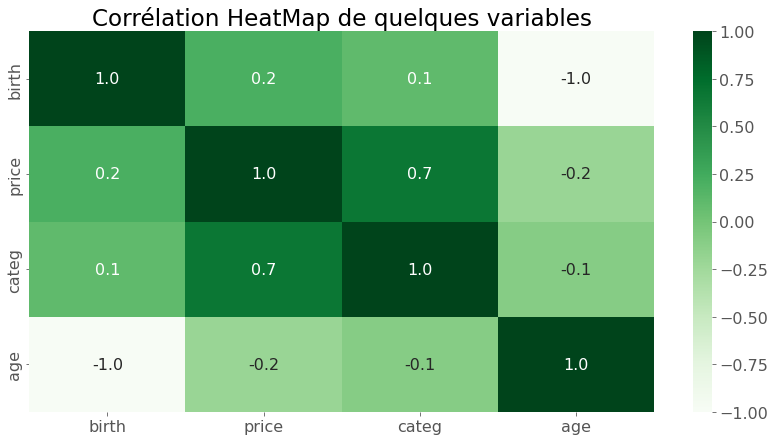

In [84]:
#Méthode .corr() avec par défaut la formule de la corrélation linéaire de Pearson
sns.heatmap(df.corr(), annot=True, fmt=".1f", cmap='Greens')
plt.title('Corrélation HeatMap de quelques variables')
plt.savefig("graphic/heatmap_global.png")
plt.show()

*Cet HeatMap renvoie une première image des possibles corrélations linéaires. Par exemple, les prix produits / catégories sont fortement corrélés. Dans notre contexte cette analyse se révèle trop succincte, d'autres tests doivent-être menés au cas par cas…*

## Analyse de la corrélation entre le genre des clients et les catégories de produits achetés

In [85]:
#Création du tableau de contingence "Matrice des valeurs observées"
#Variables 'sex' et 'categ' du dataframe df
X = 'sex'
Y = 'categ'

#Calcul du tableau de contigence par la méthode .pivot_table()
c = df[[X, Y]].pivot_table(index=X, columns=Y, aggfunc=len) ###, margins=True, margins_name='Total'
tx = df[X].value_counts()
ty = df[Y].value_counts()

#Création d'une copie du dataframe original
cont = c.copy()
cont

categ,0.0,1.0,2.0
sex,,,
f,196643,113927,16712
m,199318,111234,18581


In [86]:
#Création du tableau théorique "Matrice des valeurs attendues"
#L’occurrence attendue est simplement la fréquence que l’on devrait trouver dans une cellule 
#si l’hypothèse nulle était vraie.
tx_df= pd.DataFrame(tx)
ty_df = pd.DataFrame(ty)

tx_df.columns = ["s"]
ty_df.columns = ["s"]

#Valeurs totales observées
n = len(df)

#Produit matriciel. On utilise pd.T pour pivoter une des deux séries.
indep = (tx_df.dot(ty_df.T) / n)
indep

,0.0,1.0,2.0
m,198538.777775,112897.961523,17696.260702
f,197422.222225,112263.038477,17596.739298


In [87]:
#Matrice "écart au carré normalisé de la valeur attendue VS valeur observée"
mesure = (c-indep)**2/indep
mesure

categ,0.0,1.0,2.0
f,3.075577,24.663219,44.483447
m,3.058281,24.524517,44.233278


In [88]:
#Calcul du Chi2
#Tester l’hypothèse nulle consiste à comparer les occurrences observées (celles déjà dans le tableau) 
#avec les occurrences attendues.
chi2 = mesure.sum().sum()
chi2

144.0383194139693

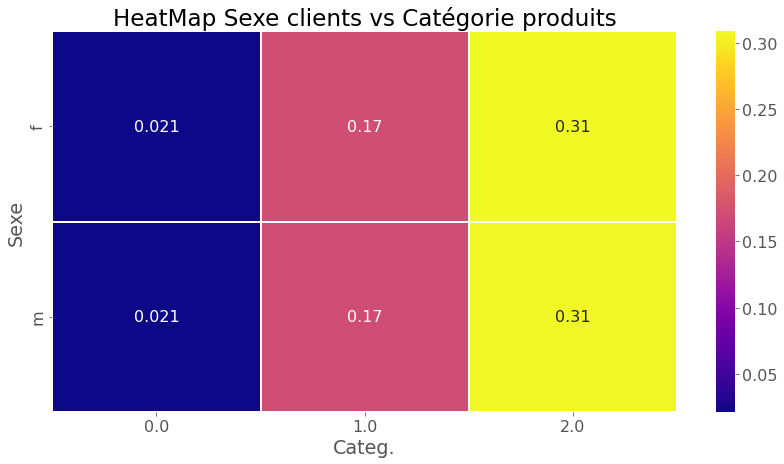

In [89]:
#HeatMap 
table = (mesure/chi2)
sns.heatmap(table, annot=True, cmap="plasma", linewidths=0.1)

plt.title('HeatMap Sexe clients vs Catégorie produits')
plt.xlabel('Categ.')
plt.ylabel('Sexe')

plt.savefig("graphic/heatmap_sexe_categories.png")
plt.show()

Le test de Chi2 est utilisé pour tester l'hypothèse nulle (H0) d'absence de relation entre deux variables catégorielles, ce test vérifie donc l'hypothèse d'indépendance de ces variables.

La valeur de Chi2 est une quantification de cet écart (entre les occurences attendues et celles observées). Plus la valeur sera élevée, plus l'écart entre l'hypothèse nulle et la situation réelle sera grand.

Plus l’occurrence observée est près de l’occurrence attendue, plus la fraction calculée pour chaque cellule est petite et moins l’écart avec H0 est grand.

## test de normalité shapiro

Un point de décision important lorsque l'on travaille avec un échantillon de données est de savoir s'il faut utiliser des méthodes statistiques paramétriques (en cas ou les donnée sont gaussienne) ou non paramétriques (non gaussienne).

In [90]:
#Calcul du khi2 et de la p-value à partir de la matrice des valeurs observées avec scipy 
#Degré de liberté = (nombre de lignes – 1) X (nombre de colonnes – 1)
chi2, pvalue, degrees, expected = st.chi2_contingency(cont)
chi2, degrees, pvalue

(144.0383194139693, 2, 5.278084610943292e-32)

In [91]:
sp = st.shapiro(cont)
sp

ShapiroResult(statistic=0.863050639629364, pvalue=0.1998804807662964)

L'indice élevé du Chi2 démontre une importance significative entre les occurences théoriques et celles du tableau de contigence. De plus, la comparaison de p-value (4e-16%) avec notre seuil de significativité (traditionnellement 5%) expose une valeur inférieure au seuil. L'hypothèse nulle est rejetée en faveur de l’hypothèse alternative, il existe donc un lien entre le sexe des clients et les catégories produits.

## Analyse de la corrélation entre l'âge clients et le montant total des achats

In [92]:
#Agrégation pour sommer les ventes 'price' (produits achetés) en fonction de l'âge des clients
#Création d'une variable 'age_price'
age_price = df.groupby('age').sum().reset_index()
age_price = age_price[['age', 'price']].sort_values(by='age', ascending=False) 
age_price['price'] = age_price['price'] / 1000 #Valeurs exprimées en K€

age_price.head() #Apperçu des données âges / ventes

,age,price
75,93,3.197080
74,92,3.959240
73,91,2.691190
72,90,4.803640
71,89,5.093415


In [93]:
age_price.tail()

,age,price
4,22,160.538290
3,21,174.222150
2,20,178.430284
1,19,172.804760
0,18,591.017020


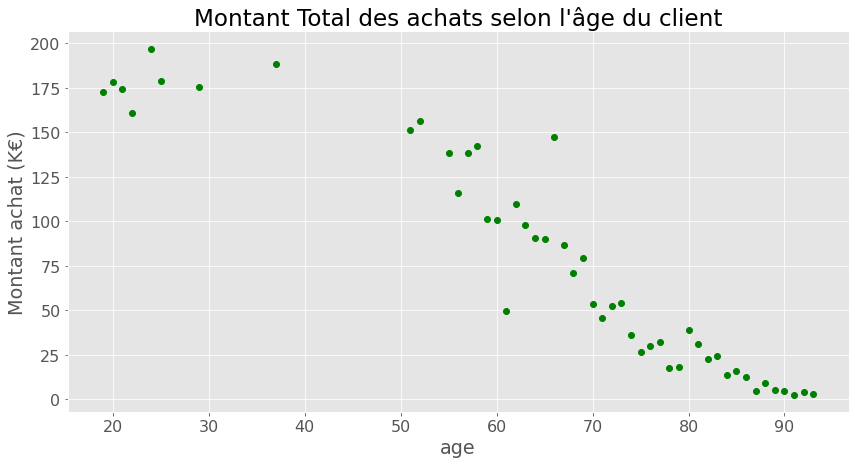

In [94]:
#Visualisation avec un scatterplot (âge clients vs montant total des achats)
plt.plot(age_price[age_price.price < 200].age, age_price[age_price.price < 200].price, 'o', color='green')
plt.xlabel('age')
plt.ylabel('Montant achat (K€)')
plt.title('Montant Total des achats selon l\'âge du client')
plt.savefig("graphic/scatterplot_montant_achat_age_client.png")
plt.show()

In [95]:
#Coefficient de corrélation linéaire de Pearson
coef_age_price = st.pearsonr(age_price.age, age_price.price)[0]
coef_age_price

-0.7793059701236267

Le coefficient est négatif par conséquent, on peut émettre l'hypothèse que plus les consommateurs sont agés plus le montant total de leur achat est faible. Or le coefficient est plus proche de -1 que de zéro. Par conséquent, on peut affirmer que plus les consommateurs sont agés plus le montant total de leur achat est faible.(forte correlation)

## Analyse de la corrélation entre l'âge clients et la fréquence d'achat
Ici la fréquence d'achat correspond au nombre d'achats par mois

In [96]:
#Analyse faite à partir du dataframe global df
df.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,55
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,25.99,1.0,55
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,14.53,1.0,55
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0.0,55
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1.0,55


In [97]:
#Agrégation des données selon l'âge client
#Le nombre d'achat mensuel est obtenu à partir du comptage des sessions clients par mois
#Hypothèse 1 id_session = 1 transation
customers_freq = df.groupby('age').count().reset_index()
customers_freq = customers_freq[['age', 'session_id']]

#Création d'une variable fréquence 'f'
customers_freq['f'] = customers_freq['session_id'] / sum(customers_freq['session_id'])
customers_freq.sort_values(by='age', ascending=False).head(10)

,age,session_id,f
75,93,199,0.000303
74,92,222,0.000338
73,91,164,0.000250
72,90,293,0.000446
71,89,314,0.000478
70,88,536,0.000817
69,87,260,0.000396
68,86,749,0.001141
67,85,922,0.001405
66,84,819,0.001248


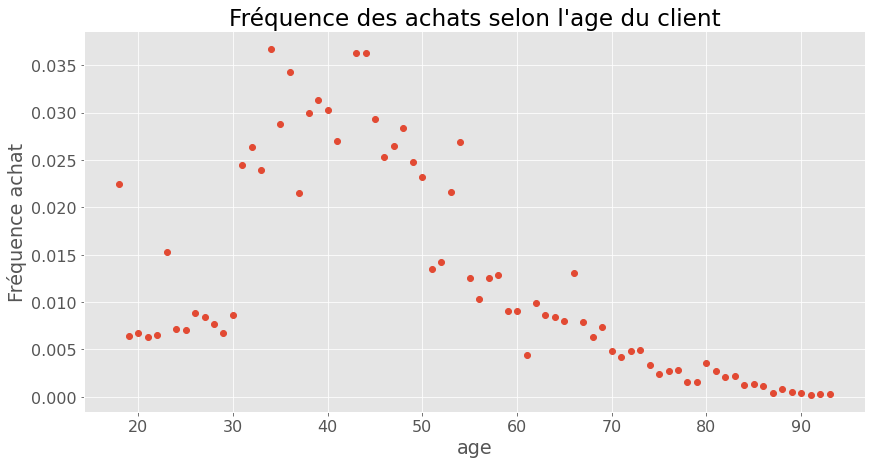

In [98]:
plt.plot(customers_freq[customers_freq.f < .05].age, customers_freq[customers_freq.f < .05].f, 'o')
plt.xlabel('age')
plt.ylabel('Fréquence achat')
plt.title('Fréquence des achats selon l\'age du client')

plt.savefig("graphic/scatterplot_frequence_achat_age_client.png")
plt.show()

In [99]:
#Coefficient de corrélation linéaire de Pearson
coef_customers_freq = st.pearsonr(customers_freq.age, customers_freq.f)[0]
coef_customers_freq

-0.5352294934719815

*Corrélation confirmée par le coefficient de Pearson, il existe bien un lien entre l'âge des clients et leurs fréquences d'achat. Il semblerait que des groupes de clients se formalisent sur cette corrélation, par exemple entre 18 et 30 ans.*

## Analyse de la corrélation entre l'âge clients et la taille du panier moyen 
Ici la taille du panier moyen sera exprimée en nombre d'articles

In [100]:
#Analyse faite à partir du dataframe global df
df.head()

,client_id,sex,birth,id_prod,date,session_id,price,categ,age
0,c_4410,f,1967,0_1316,2021-12-29 09:11:18.860592,s_141762,7.20,0.0,55
1,c_4410,f,1967,1_385,2021-03-22 01:40:22.782925,s_9707,25.99,1.0,55
2,c_4410,f,1967,1_190,2021-11-12 18:11:43.280574,s_118628,14.53,1.0,55
3,c_4410,f,1967,0_1455,2021-03-22 14:29:25.189266,s_9942,8.99,0.0,55
4,c_4410,f,1967,1_483,2022-03-13 21:35:55.949042,s_178686,15.99,1.0,55


In [101]:
#Première agrégation selon l'age client et les sessions en comptage de modalités
customers_shop = df.groupby(['age', 'session_id']).count().reset_index()

#Seconde agrégation selon l'age client en moyenne de produits achetés 
customers_shop = customers_shop.groupby('age').mean().reset_index()
customers_shop = customers_shop[['age', 'id_prod']]
customers_shop.tail()

,age,id_prod
71,89,1.408072
72,90,1.494898
73,91,1.802198
74,92,1.552448
75,93,1.507576


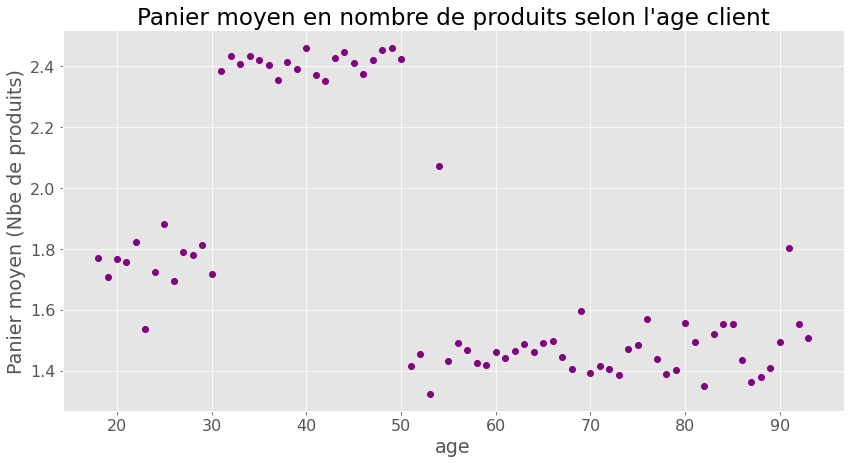

In [102]:
#Visualisation avec un scatterplot (âge client vs taille panier moyen)
plt.plot(customers_shop.age, customers_shop.id_prod, 'o', color='purple')
plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')
plt.savefig("graphic/scatterplot_panier_moyen_age_client.png")
plt.show()

In [103]:
#Subsets pour identifier les clusters clients 
customers_shop31 = customers_shop[customers_shop.age < 31]
customers_shop3050 = customers_shop[(customers_shop.age > 31) & (customers_shop.age < 50)]
customers_shop50 = customers_shop[customers_shop.age > 51]

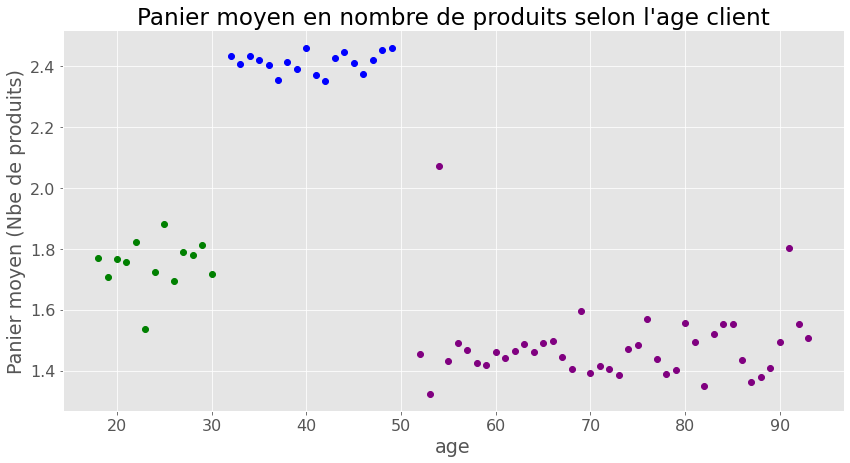

In [104]:
#Visualisation avec scatterplot selon les groupes d'individus identifiés
plt.plot(customers_shop31.age, customers_shop31.id_prod, 'o', color='green')
plt.plot(customers_shop3050.age, customers_shop3050.id_prod, 'o', color='blue')
plt.plot(customers_shop50.age, customers_shop50.id_prod, 'o', color='purple')

plt.xlabel('age')
plt.ylabel('Panier moyen (Nbe de produits)')
plt.title('Panier moyen en nombre de produits selon l\'age client')

plt.savefig("graphic/scatterplot_panier_moyen_age_client_clusters.png")
plt.show()

In [105]:
#Coefficient de corrélation linéaire de Pearson
coef_customers_shop = st.pearsonr(customers_shop.age, customers_shop.id_prod)
coef_customers_shop 

(-0.5716348608385913, 6.914943289135856e-08)

*Le test de corrélation démontre un certain lien entre l'âge du client et le panier moyen. Par exemple, sur les individus de plus de 50 ans, le panier moyen reste faible. Il existe également un lien sur les individus de 18 à 30 ans et de 30 à 50 ans. La linéarité de la corrélation existe mais selon des corpus de clients visiblement distincts, par tranches d'âges.*

## Analyse de la corrélation entre l'âge clients et la catégorie produits

Afin de simplifier l'analyse, il est nécessaire de procéder par un découpage en classes (discrétisation). Donc très clairement le but est de pouvoir réduire nos individus "âges" par classes, de manière à pouvoir interpréter plus facilement les résultats.

**Comment choisir le nombre de classes?**

Avec par exemple la formule de Sturges-Huntsberger : k = 1 + 3.33*log(N,base=10)

ou encore Brooks-Carruthers : k = 5*log(N,base=10)

In [106]:
#N est le nombre d'observations, ici représentées par les valeurs transactionnelles par âge et par catégorie
len(df.groupby(['age', 'categ']).count().reset_index())

228

In [107]:
#Formule de Huntsberger : 1 + 3,3*log10(N)
round((1 + ((10/3) * mth.log10(228))),0)

9.0

In [108]:
#Formule de Brooks-Carruthers : 5*log10(N)
round((5 * mth.log10(228)),0)

12.0

Dans notre contexte, nous pouvons retenir un nombre de classes de 9.

In [109]:
#Méthode .groupby() pour agréger les données selon l'âge et la catégorie
age_categ = df.groupby(['age', 'categ']).count().reset_index()
age_categ = age_categ[['age', 'categ', 'session_id']]
age_categ.head()

,age,categ,session_id
0,18,0.0,3276
1,18,1.0,5661
2,18,2.0,5813
3,19,0.0,850
4,19,1.0,1661


In [110]:
#Méthode .cut() pour créer les 9 groupes d'âges, une segmentation des individus 'age'
age_categ['age']= pd.cut(age_categ['age'], 9)
age_categ = age_categ.groupby(['age','categ']).sum().reset_index()
age_categ.head(10)

,age,categ,session_id
0,"(17.925, 26.333]",0.0,11466
1,"(17.925, 26.333]",1.0,21710
2,"(17.925, 26.333]",2.0,23882
3,"(26.333, 34.667]",0.0,59913
4,"(26.333, 34.667]",1.0,25362
5,"(26.333, 34.667]",2.0,8538
6,"(34.667, 43.0]",0.0,153091
7,"(34.667, 43.0]",1.0,48917
8,"(34.667, 43.0]",2.0,690
9,"(43.0, 51.333]",0.0,99529


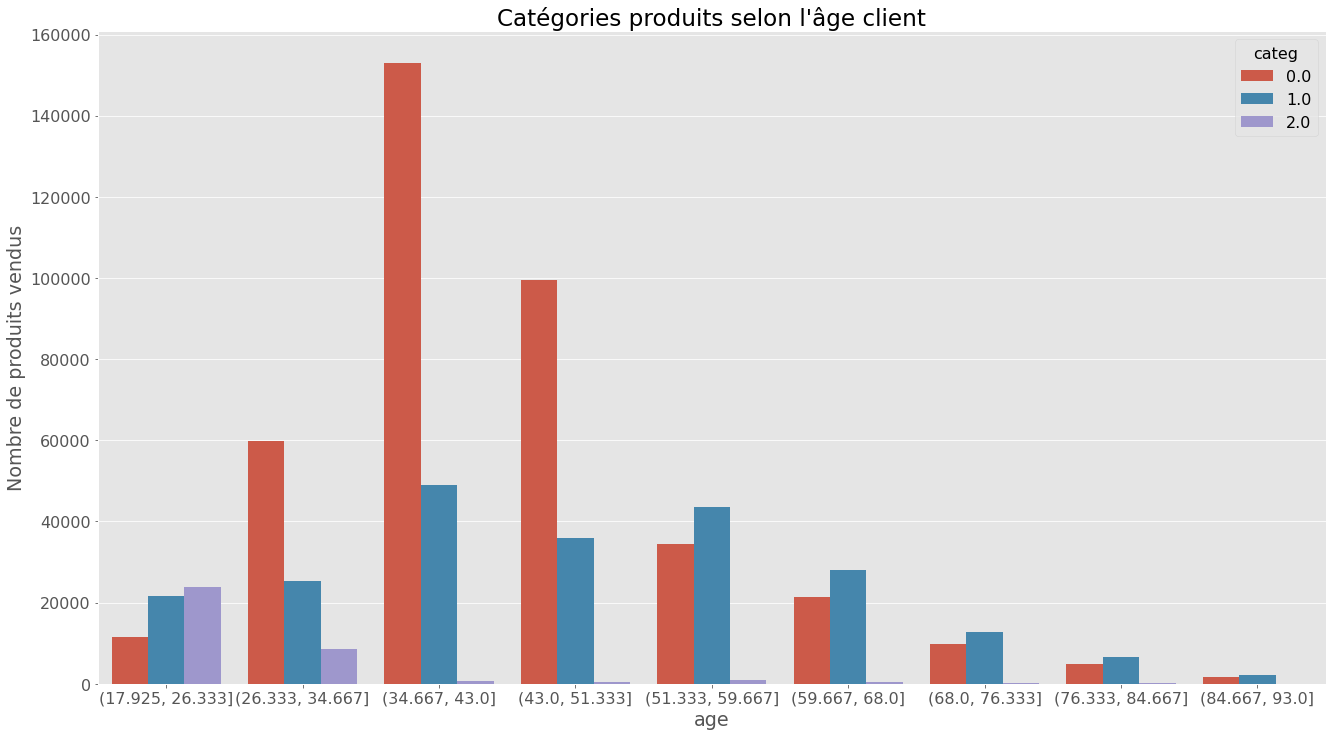

In [111]:
#Visualisation rapide avec une BarPlot Seaborn
fig, ax = plt.subplots(figsize=(22, 12))
sns.barplot(x="age", y="session_id",hue="categ", data=age_categ)
ax.set_xlabel('age')
ax.set_ylabel('Nombre de produits vendus')
ax.set_title('Catégories produits selon l\'âge client')
plt.savefig("graphic/barplot_categorie_produit_age_client")
plt.show()

In [112]:
#Coefficient de corrélation eta au carré
X = "categ" #qualitative
Y = "age" #quantitative

def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT

Cette fonction calcule le rapport de corrélation η^2 (eta-carré) qui est une mesure d'association importante entre une variable quantitative et une variable qualitative.

In [113]:
round(eta_squared(age_categ.age, age_categ.session_id), 2)

0.35

Le rapport de corrélation est proche de 0.40, ce qui précise le précédent graphique dans lequel une certaine corrélation entre les catégories et l'âge client. Il est perceptible de voir le lien que peut avoir une catégorie en fonction d'une tranche d'âges, avec par exemple un fort succès de la catégorie 0 pour les 34 / 44 ans, ou à l'inverse une clientèle plus âgée n'adhère quasiment pas à cette catégorie, etc..

**En conclusion**

L'analyse exploratoire faite à partir de ces 3 sources de données permettent d'avoir une première approche unidimensionnelle, à savoir la ressemblance entre individus, la variabilité des données, etc. Puis dans un second temps une approche multidimensionnelle permettant d'identifier les différentes corrélations, les liens possibles entre nos variables.

La catégorie 2 ressort moins populaire que les deux autres, moins de quantités vendues, moins de chiffre d'affaires, mais un panier moyen qui reste beaucoup plus élevé

Il serait interessant de pousser l'analyse sur d'autres aspects business comme celui de l'acquisition du prospect, l'origine de la transaction client, avec par exemple une question : canal internet (si oui dans quel localité se trouve le client?) ou magasin physique (si oui lequel?).